In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week7New/")

In [ ]:
import time
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.cifar10_dialation_dsc import Cifar10Net
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from torchsummary import summary

In [ ]:
logger = logger_utils.get_logger(__name__)

In [ ]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 frog truck   car  bird


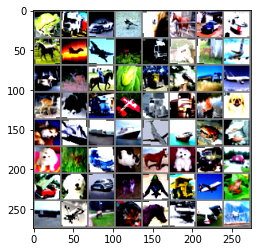

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [ ]:
device = get_device_type()
model = Cifar10Net().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
 Conv2d_BasicBlock-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
 Conv2d_BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
Conv2d_BasicBlock-12          [-1, 128, 32, 32]               0
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14   

/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [ ]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

# models_dict = {'l1_BN': {'model': get_base_model(), 'l1_lambda':3.994568295536243e-05},
#           'l2_BN': {'model': get_base_model(), 'l2_lambda':0.0002871},
#           'l1_l2_BN': {'model': get_base_model(), 'l1_lambda':1.4700778484806588e-05, 'l2_lambda':1.4212922008994122e-05},
#           'GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':0, 'l2_lambda':0},
#           'l1_l2_GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':8.283167683030542e-05, 'l2_lambda':9.098971072011508e-05},
#           }
models_dict = {'cifar10': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

## Training

train_loader, test_loader = get_data_loaders()
results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
CUDA Available? True
CUDA Available? True
Files already downloaded and verified


  0%|          | 0/782 [00:00<?, ?it/s]

CUDA Available? True
CUDA Available? True
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****


**** Started training ****


Model: cifar10

0 0
[EPOCH:0]


/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.1629823446273804 Batch_id=781 Current_train_batch_accuracy=47.17: 100%|██████████| 782/782 [00:38<00:00, 20.50it/s]



Train set: Average loss: 1.1736, Accuracy: 28853/50000 (57.71%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1612, Accuracy: 5803/10000 (58.03%)

best_test_accuracy 58.03
[EPOCH:1]


Loss=0.6905932426452637 Batch_id=781 Current_train_batch_accuracy=63.14: 100%|██████████| 782/782 [00:38<00:00, 20.55it/s]



Train set: Average loss: 0.9825, Accuracy: 32915/50000 (65.83%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9524, Accuracy: 6657/10000 (66.57%)

best_test_accuracy 66.57
[EPOCH:2]


Loss=0.41832563281059265 Batch_id=781 Current_train_batch_accuracy=69.78: 100%|██████████| 782/782 [00:37<00:00, 20.69it/s]



Train set: Average loss: 0.7678, Accuracy: 36557/50000 (73.11%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7738, Accuracy: 7308/10000 (73.08%)

best_test_accuracy 73.08
[EPOCH:3]


Loss=0.8753328919410706 Batch_id=781 Current_train_batch_accuracy=73.51: 100%|██████████| 782/782 [00:37<00:00, 20.69it/s]



Train set: Average loss: 0.6970, Accuracy: 37959/50000 (75.92%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7193, Accuracy: 7497/10000 (74.97%)

best_test_accuracy 74.97
[EPOCH:4]


Loss=1.1170628070831299 Batch_id=781 Current_train_batch_accuracy=76.01: 100%|██████████| 782/782 [00:38<00:00, 20.47it/s]



Train set: Average loss: 0.6310, Accuracy: 38984/50000 (77.97%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6602, Accuracy: 7736/10000 (77.36%)

best_test_accuracy 77.36
[EPOCH:5]


Loss=0.6895406246185303 Batch_id=781 Current_train_batch_accuracy=77.63: 100%|██████████| 782/782 [00:37<00:00, 20.62it/s]



Train set: Average loss: 0.6087, Accuracy: 39384/50000 (78.77%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6383, Accuracy: 7822/10000 (78.22%)

best_test_accuracy 78.22
[EPOCH:6]


Loss=0.25070738792419434 Batch_id=781 Current_train_batch_accuracy=79.17: 100%|██████████| 782/782 [00:37<00:00, 20.58it/s]



Train set: Average loss: 0.5884, Accuracy: 39770/50000 (79.54%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6377, Accuracy: 7871/10000 (78.71%)

best_test_accuracy 78.71
[EPOCH:7]


Loss=0.8940204381942749 Batch_id=781 Current_train_batch_accuracy=80.11: 100%|██████████| 782/782 [00:38<00:00, 20.47it/s]



Train set: Average loss: 0.5471, Accuracy: 40488/50000 (80.98%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6065, Accuracy: 7943/10000 (79.43%)

best_test_accuracy 79.43
[EPOCH:8]


Loss=0.8736658692359924 Batch_id=781 Current_train_batch_accuracy=81.33: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]



Train set: Average loss: 0.5112, Accuracy: 40952/50000 (81.90%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5824, Accuracy: 8039/10000 (80.39%)

best_test_accuracy 80.39
[EPOCH:9]


Loss=1.0963428020477295 Batch_id=781 Current_train_batch_accuracy=82.17: 100%|██████████| 782/782 [00:38<00:00, 20.39it/s]



Train set: Average loss: 0.4728, Accuracy: 41747/50000 (83.49%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5586, Accuracy: 8126/10000 (81.26%)

best_test_accuracy 81.26
[EPOCH:10]


Loss=0.2816252112388611 Batch_id=781 Current_train_batch_accuracy=83.04: 100%|██████████| 782/782 [00:38<00:00, 20.53it/s]



Train set: Average loss: 0.6045, Accuracy: 39976/50000 (79.95%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6438, Accuracy: 7882/10000 (78.82%)

best_test_accuracy 81.26
[EPOCH:11]


Loss=0.3846438527107239 Batch_id=781 Current_train_batch_accuracy=83.78: 100%|██████████| 782/782 [00:38<00:00, 20.49it/s]



Train set: Average loss: 0.4479, Accuracy: 42206/50000 (84.41%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5402, Accuracy: 8184/10000 (81.84%)

best_test_accuracy 81.84
[EPOCH:12]


Loss=0.4795437753200531 Batch_id=781 Current_train_batch_accuracy=87.40: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]



Train set: Average loss: 0.3086, Accuracy: 44645/50000 (89.29%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4399, Accuracy: 8531/10000 (85.31%)

best_test_accuracy 85.31
[EPOCH:13]


Loss=0.43035629391670227 Batch_id=781 Current_train_batch_accuracy=88.16: 100%|██████████| 782/782 [00:38<00:00, 20.50it/s]



Train set: Average loss: 0.2936, Accuracy: 44919/50000 (89.84%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4404, Accuracy: 8552/10000 (85.52%)

best_test_accuracy 85.52
[EPOCH:14]


Loss=0.3483027517795563 Batch_id=781 Current_train_batch_accuracy=88.70: 100%|██████████| 782/782 [00:37<00:00, 20.68it/s]



Train set: Average loss: 0.2846, Accuracy: 45024/50000 (90.05%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4371, Accuracy: 8554/10000 (85.54%)

best_test_accuracy 85.54
[EPOCH:15]


Loss=0.3242780268192291 Batch_id=781 Current_train_batch_accuracy=88.97: 100%|██████████| 782/782 [00:38<00:00, 20.40it/s]



Train set: Average loss: 0.2740, Accuracy: 45245/50000 (90.49%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4303, Accuracy: 8595/10000 (85.95%)

best_test_accuracy 85.95
[EPOCH:16]


Loss=0.27759119868278503 Batch_id=781 Current_train_batch_accuracy=89.25: 100%|██████████| 782/782 [00:38<00:00, 20.42it/s]



Train set: Average loss: 0.2715, Accuracy: 45336/50000 (90.67%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4444, Accuracy: 8539/10000 (85.39%)

best_test_accuracy 85.95
[EPOCH:17]


Loss=0.1270594447851181 Batch_id=781 Current_train_batch_accuracy=89.41: 100%|██████████| 782/782 [00:38<00:00, 20.38it/s]



Train set: Average loss: 0.2587, Accuracy: 45539/50000 (91.08%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4372, Accuracy: 8564/10000 (85.64%)

best_test_accuracy 85.95
[EPOCH:18]


Loss=0.33858320116996765 Batch_id=781 Current_train_batch_accuracy=89.71: 100%|██████████| 782/782 [00:38<00:00, 20.43it/s]



Train set: Average loss: 0.2572, Accuracy: 45482/50000 (90.96%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4509, Accuracy: 8554/10000 (85.54%)

best_test_accuracy 85.95
[EPOCH:19]


Loss=0.4472811818122864 Batch_id=781 Current_train_batch_accuracy=89.78: 100%|██████████| 782/782 [00:38<00:00, 20.42it/s]



Train set: Average loss: 0.2531, Accuracy: 45544/50000 (91.09%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4494, Accuracy: 8548/10000 (85.48%)

best_test_accuracy 85.95
[EPOCH:20]


Loss=0.6823523640632629 Batch_id=781 Current_train_batch_accuracy=90.13: 100%|██████████| 782/782 [00:38<00:00, 20.52it/s]



Train set: Average loss: 0.2413, Accuracy: 45764/50000 (91.53%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4448, Accuracy: 8581/10000 (85.81%)

best_test_accuracy 85.95
[EPOCH:21]


Loss=0.4956626892089844 Batch_id=781 Current_train_batch_accuracy=90.23: 100%|██████████| 782/782 [00:38<00:00, 20.31it/s]



Train set: Average loss: 0.2316, Accuracy: 45980/50000 (91.96%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4396, Accuracy: 8611/10000 (86.11%)

best_test_accuracy 86.11
[EPOCH:22]


Loss=0.19535045325756073 Batch_id=781 Current_train_batch_accuracy=90.35: 100%|██████████| 782/782 [00:38<00:00, 20.55it/s]



Train set: Average loss: 0.2295, Accuracy: 46031/50000 (92.06%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4416, Accuracy: 8589/10000 (85.89%)

best_test_accuracy 86.11
[EPOCH:23]


Loss=0.7957183718681335 Batch_id=781 Current_train_batch_accuracy=90.69: 100%|██████████| 782/782 [00:38<00:00, 20.34it/s]



Train set: Average loss: 0.2262, Accuracy: 46096/50000 (92.19%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4475, Accuracy: 8607/10000 (86.07%)

best_test_accuracy 86.11
[EPOCH:24]


Loss=0.18587124347686768 Batch_id=781 Current_train_batch_accuracy=91.86: 100%|██████████| 782/782 [00:38<00:00, 20.40it/s]



Train set: Average loss: 0.2001, Accuracy: 46521/50000 (93.04%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4243, Accuracy: 8647/10000 (86.47%)

best_test_accuracy 86.47
[EPOCH:25]


Loss=0.09049753844738007 Batch_id=781 Current_train_batch_accuracy=92.30: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]



Train set: Average loss: 0.1939, Accuracy: 46692/50000 (93.38%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4258, Accuracy: 8642/10000 (86.42%)

best_test_accuracy 86.47
[EPOCH:26]


Loss=0.37966418266296387 Batch_id=781 Current_train_batch_accuracy=92.29: 100%|██████████| 782/782 [00:38<00:00, 20.17it/s]



Train set: Average loss: 0.1924, Accuracy: 46662/50000 (93.32%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4332, Accuracy: 8634/10000 (86.34%)

best_test_accuracy 86.47
[EPOCH:27]


Loss=0.10207866132259369 Batch_id=781 Current_train_batch_accuracy=92.36: 100%|██████████| 782/782 [00:38<00:00, 20.18it/s]



Train set: Average loss: 0.1898, Accuracy: 46755/50000 (93.51%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4324, Accuracy: 8639/10000 (86.39%)

best_test_accuracy 86.47
[EPOCH:28]


Loss=0.24746784567832947 Batch_id=781 Current_train_batch_accuracy=92.39: 100%|██████████| 782/782 [00:38<00:00, 20.34it/s]



Train set: Average loss: 0.1829, Accuracy: 46878/50000 (93.76%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4386, Accuracy: 8664/10000 (86.64%)

best_test_accuracy 86.64
[EPOCH:29]


Loss=0.188059464097023 Batch_id=781 Current_train_batch_accuracy=92.48: 100%|██████████| 782/782 [00:38<00:00, 20.21it/s]



Train set: Average loss: 0.1832, Accuracy: 46834/50000 (93.67%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4390, Accuracy: 8643/10000 (86.43%)

best_test_accuracy 86.64
[EPOCH:30]


Loss=0.17750193178653717 Batch_id=781 Current_train_batch_accuracy=92.45: 100%|██████████| 782/782 [00:38<00:00, 20.10it/s]



Train set: Average loss: 0.1791, Accuracy: 46930/50000 (93.86%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4381, Accuracy: 8655/10000 (86.55%)

best_test_accuracy 86.64
[EPOCH:31]


Loss=0.5374583005905151 Batch_id=781 Current_train_batch_accuracy=92.84: 100%|██████████| 782/782 [00:38<00:00, 20.23it/s]



Train set: Average loss: 0.1787, Accuracy: 46921/50000 (93.84%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4479, Accuracy: 8637/10000 (86.37%)

best_test_accuracy 86.64
[EPOCH:32]


Loss=0.42879512906074524 Batch_id=781 Current_train_batch_accuracy=92.64: 100%|██████████| 782/782 [00:38<00:00, 20.34it/s]



Train set: Average loss: 0.1765, Accuracy: 46898/50000 (93.80%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4418, Accuracy: 8646/10000 (86.46%)

best_test_accuracy 86.64
[EPOCH:33]


Loss=0.3698258697986603 Batch_id=781 Current_train_batch_accuracy=92.79: 100%|██████████| 782/782 [00:38<00:00, 20.06it/s]



Train set: Average loss: 0.1747, Accuracy: 46989/50000 (93.98%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4480, Accuracy: 8647/10000 (86.47%)

best_test_accuracy 86.64
[EPOCH:34]


Loss=0.42667534947395325 Batch_id=781 Current_train_batch_accuracy=93.00: 100%|██████████| 782/782 [00:38<00:00, 20.53it/s]



Train set: Average loss: 0.1740, Accuracy: 46998/50000 (94.00%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4480, Accuracy: 8650/10000 (86.50%)

best_test_accuracy 86.64
[EPOCH:35]


Loss=0.2573544681072235 Batch_id=781 Current_train_batch_accuracy=93.09: 100%|██████████| 782/782 [00:38<00:00, 20.57it/s]



Train set: Average loss: 0.1696, Accuracy: 47067/50000 (94.13%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4468, Accuracy: 8643/10000 (86.43%)

best_test_accuracy 86.64
[EPOCH:36]


Loss=0.22377967834472656 Batch_id=781 Current_train_batch_accuracy=93.00: 100%|██████████| 782/782 [00:38<00:00, 20.58it/s]



Train set: Average loss: 0.1676, Accuracy: 47101/50000 (94.20%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4492, Accuracy: 8648/10000 (86.48%)

best_test_accuracy 86.64
[EPOCH:37]


Loss=0.015951910987496376 Batch_id=781 Current_train_batch_accuracy=93.23: 100%|██████████| 782/782 [00:38<00:00, 20.45it/s]



Train set: Average loss: 0.1634, Accuracy: 47190/50000 (94.38%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4471, Accuracy: 8642/10000 (86.42%)

best_test_accuracy 86.64
[EPOCH:38]


Loss=0.19536423683166504 Batch_id=781 Current_train_batch_accuracy=93.26: 100%|██████████| 782/782 [00:37<00:00, 20.63it/s]



Train set: Average loss: 0.1680, Accuracy: 47102/50000 (94.20%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4512, Accuracy: 8628/10000 (86.28%)

best_test_accuracy 86.64
[EPOCH:39]


Loss=0.12295028567314148 Batch_id=781 Current_train_batch_accuracy=93.34: 100%|██████████| 782/782 [00:38<00:00, 20.16it/s]



Train set: Average loss: 0.1632, Accuracy: 47213/50000 (94.43%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4443, Accuracy: 8650/10000 (86.50%)

best_test_accuracy 86.64
[EPOCH:40]


Loss=0.21503393352031708 Batch_id=781 Current_train_batch_accuracy=93.34: 100%|██████████| 782/782 [00:39<00:00, 19.90it/s]



Train set: Average loss: 0.1638, Accuracy: 47147/50000 (94.29%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4483, Accuracy: 8627/10000 (86.27%)

best_test_accuracy 86.64
[EPOCH:41]


Loss=0.4215044379234314 Batch_id=781 Current_train_batch_accuracy=93.48: 100%|██████████| 782/782 [00:38<00:00, 20.12it/s]



Train set: Average loss: 0.1628, Accuracy: 47235/50000 (94.47%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4470, Accuracy: 8652/10000 (86.52%)

best_test_accuracy 86.64
[EPOCH:42]


Loss=0.12915156781673431 Batch_id=781 Current_train_batch_accuracy=93.22: 100%|██████████| 782/782 [00:38<00:00, 20.12it/s]



Train set: Average loss: 0.1601, Accuracy: 47247/50000 (94.49%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4502, Accuracy: 8651/10000 (86.51%)

best_test_accuracy 86.64
[EPOCH:43]


Loss=0.18506960570812225 Batch_id=781 Current_train_batch_accuracy=93.30: 100%|██████████| 782/782 [00:38<00:00, 20.14it/s]



Train set: Average loss: 0.1614, Accuracy: 47237/50000 (94.47%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4514, Accuracy: 8666/10000 (86.66%)

best_test_accuracy 86.66
[EPOCH:44]


Loss=0.12555579841136932 Batch_id=781 Current_train_batch_accuracy=93.32: 100%|██████████| 782/782 [00:38<00:00, 20.47it/s]



Train set: Average loss: 0.1633, Accuracy: 47214/50000 (94.43%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4534, Accuracy: 8667/10000 (86.67%)

best_test_accuracy 86.67
[EPOCH:45]


Loss=0.2472212016582489 Batch_id=781 Current_train_batch_accuracy=93.50: 100%|██████████| 782/782 [00:38<00:00, 20.56it/s]



Train set: Average loss: 0.1627, Accuracy: 47189/50000 (94.38%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4576, Accuracy: 8644/10000 (86.44%)

best_test_accuracy 86.67
[EPOCH:46]


Loss=0.33953747153282166 Batch_id=781 Current_train_batch_accuracy=93.33: 100%|██████████| 782/782 [00:38<00:00, 20.50it/s]



Train set: Average loss: 0.1576, Accuracy: 47323/50000 (94.65%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4528, Accuracy: 8649/10000 (86.49%)

best_test_accuracy 86.67
[EPOCH:47]


Loss=0.022915495559573174 Batch_id=781 Current_train_batch_accuracy=93.51: 100%|██████████| 782/782 [00:38<00:00, 20.37it/s]



Train set: Average loss: 0.1603, Accuracy: 47230/50000 (94.46%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4519, Accuracy: 8655/10000 (86.55%)

best_test_accuracy 86.67
[EPOCH:48]


Loss=0.5234566926956177 Batch_id=781 Current_train_batch_accuracy=93.45: 100%|██████████| 782/782 [00:38<00:00, 20.58it/s]



Train set: Average loss: 0.1588, Accuracy: 47239/50000 (94.48%)



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4515, Accuracy: 8650/10000 (86.50%)

best_test_accuracy 86.67
[EPOCH:49]


Loss=0.4468587040901184 Batch_id=781 Current_train_batch_accuracy=93.49: 100%|██████████| 782/782 [00:39<00:00, 19.89it/s]



Train set: Average loss: 0.1604, Accuracy: 47248/50000 (94.50%)


Test set: Average loss: 0.4454, Accuracy: 8646/10000 (86.46%)

best_test_accuracy 86.67

results : {'cifar10': [[57.706, 65.83, 73.114, 75.918, 77.968, 78.768, 79.54, 80.976, 81.904, 83.494, 79.952, 84.412, 89.29, 89.838, 90.048, 90.49, 90.672, 91.078, 90.964, 91.088, 91.528, 91.96, 92.062, 92.192, 93.042, 93.384, 93.324, 93.51, 93.756, 93.668, 93.86, 93.842, 93.796, 93.978, 93.996, 94.134, 94.202, 94.38, 94.204, 94.426, 94.294, 94.47, 94.494, 94.474, 94.428, 94.378, 94.646, 94.46, 94.478, 94.496], [1.1736004774665834, 0.982519091758728, 0.767787444114685, 0.6970041222763061, 0.6309953714847565, 0.6086678862762451, 0.5884148694801331, 0.5470868527412415, 0.5112075980043411, 0.4727809512710571, 0.6045366984939575, 0.4478530290341377, 0.3085904575061798, 0.29357816882133486, 0.28460429550647737, 0.2740116158497333, 0.27148056876659393, 0.25865854128837584, 0.25719367392539977, 0.25309000931739806, 0.2412598202085495, 0.23

In [ ]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



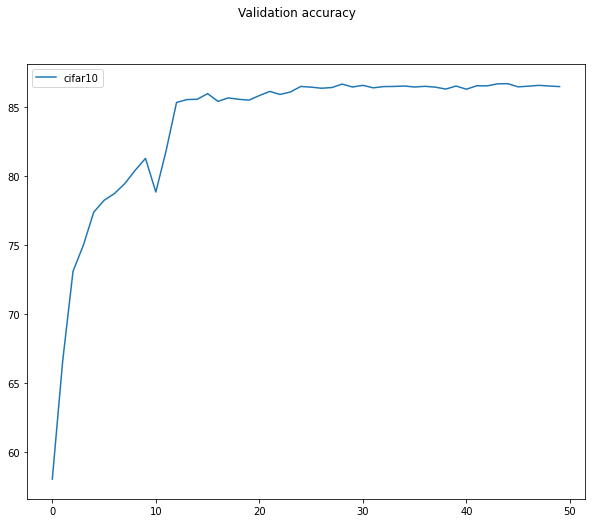


**** Ended Plotting multigraph ****



In [ ]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



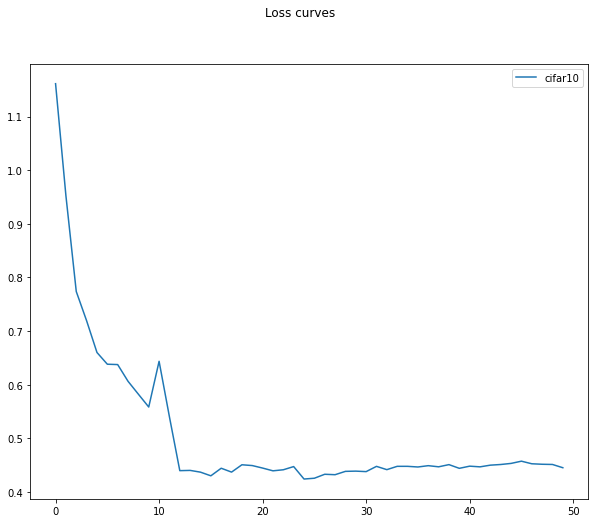


**** Ended Plotting multigraph ****



In [ ]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [ ]:
display_classwise_accuracy(test_loader,device,model)

/content/drive/My Drive/EVA5/Week7New/models/networks/cifar10_dialation_dsc.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of plane : 87 %
Accuracy of   car : 88 %
Accuracy of  bird : 79 %
Accuracy of   cat : 80 %
Accuracy of  deer : 84 %
Accuracy of   dog : 73 %
Accuracy of  frog : 82 %
Accuracy of horse : 88 %
Accuracy of  ship : 87 %
Accuracy of truck : 89 %
